In [1]:
import pandas as pd

In [2]:
hc3_all_sentences_df = pd.read_csv('hc3_all_sentences_preds.csv')

In [3]:
hc3_all_sentences_df.head()

,Unnamed: 0.1,Unnamed: 0,label,text,data_idx,pred,pred_score
0,0,0,0,"Basically there are many categories of "" Best ...",0,Human,0.999755
1,1,1,0,"Replace "" Best Seller "" by something like "" Os...",0,Human,0.999756
2,2,2,0,"May not have won the "" Best film "" , but even ...",0,Human,0.999754
3,3,3,0,Same thing for best sellers .,0,Human,0.999755
4,4,4,0,"Also , IIRC the rankings change every week or ...",0,Human,0.999753


In [4]:
hc3_all_sentences_df['pred_label'] = hc3_all_sentences_df['pred'].map({'Human':0, 'ChatGPT':1})

In [5]:
hc3_all_sentences_df.head()

,Unnamed: 0.1,Unnamed: 0,label,text,data_idx,pred,pred_score,pred_label
0,0,0,0,"Basically there are many categories of "" Best ...",0,Human,0.999755,0
1,1,1,0,"Replace "" Best Seller "" by something like "" Os...",0,Human,0.999756,0
2,2,2,0,"May not have won the "" Best film "" , but even ...",0,Human,0.999754,0
3,3,3,0,Same thing for best sellers .,0,Human,0.999755,0
4,4,4,0,"Also , IIRC the rankings change every week or ...",0,Human,0.999753,0


In [6]:
incorrect_preds_df = hc3_all_sentences_df[hc3_all_sentences_df['label'] != hc3_all_sentences_df['pred_label']]

In [7]:
incorrect_preds_df.head()

,Unnamed: 0.1,Unnamed: 0,label,text,data_idx,pred,pred_score,pred_label
68,68,68,1,2.,2,Human,0.999184,0
71,71,71,1,3.,2,Human,0.998909,0
399,399,399,1,2.,12,Human,0.999184,0
403,403,403,1,3.,12,Human,0.998909,0
407,407,407,1,4.,12,Human,0.999173,0


In [8]:
len(incorrect_preds_df)

9203

In [9]:
incorrect_preds_df.to_csv('hc3_all_sentences_incorrect_preds.csv')

In [10]:
len(incorrect_preds_df[incorrect_preds_df['text'].str.fullmatch('[0-9]\.')])

947

In [11]:
incorrect_preds_no_enums_df = incorrect_preds_df[~incorrect_preds_df['text'].str.fullmatch('[0-9]\.')]

In [12]:
incorrect_preds_no_enums_df.sample(n=5)

,Unnamed: 0.1,Unnamed: 0,label,text,data_idx,pred,pred_score,pred_label
346136,346136,346136,0,!,13160,ChatGPT,0.967111,1
505080,505080,505080,0,The current price and P/L data can be function...,20162,ChatGPT,0.864663,1
260077,260077,260077,1,"The exact amount that you leave is up to you, ...",9485,Human,0.899303,0
555560,555560,555560,0,It results from the proliferation of astrocyte...,23403,ChatGPT,0.915215,1
505182,505182,505182,0,"Once you take this approach, you might find yo...",20169,ChatGPT,0.951013,1


In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

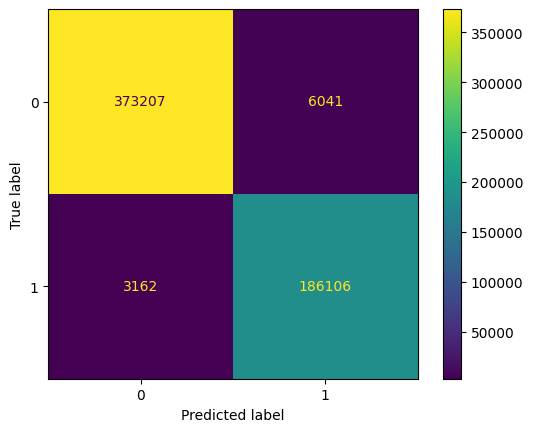

In [14]:
ConfusionMatrixDisplay.from_predictions(hc3_all_sentences_df['label'], hc3_all_sentences_df['pred_label'])
plt.show()

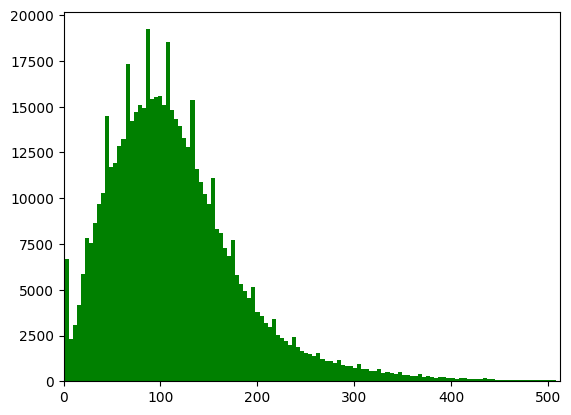

In [15]:
num_bins=512
plt.hist(hc3_all_sentences_df['text'].map(len), num_bins, color='green')
plt.xlim((0,512))
plt.show()

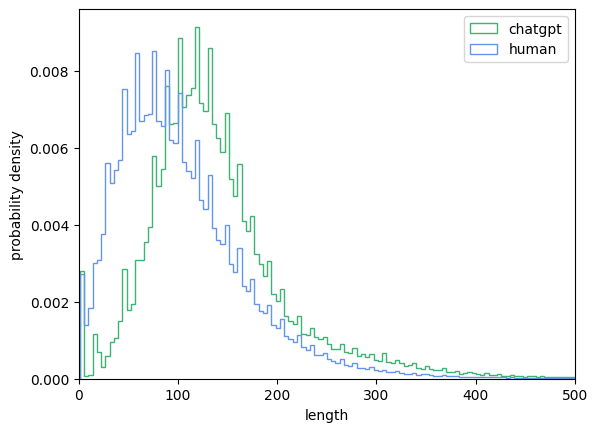

In [35]:
human_df = hc3_all_sentences_df[hc3_all_sentences_df['label']==0]
chatgpt_df = hc3_all_sentences_df[hc3_all_sentences_df['label']==1]
colors = ['cornflowerblue', 'mediumseagreen']
labels = ['human', 'chatgpt']
plt.hist(
    [human_df['text'].map(len), chatgpt_df['text'].map(len)], 
    500, 
    color=colors, 
    label=labels,
    fill=False,
    histtype='step',
    density=True,
)
plt.xlim((0,500))
plt.legend()
plt.xlabel('length')
plt.ylabel('probability density')
plt.show()

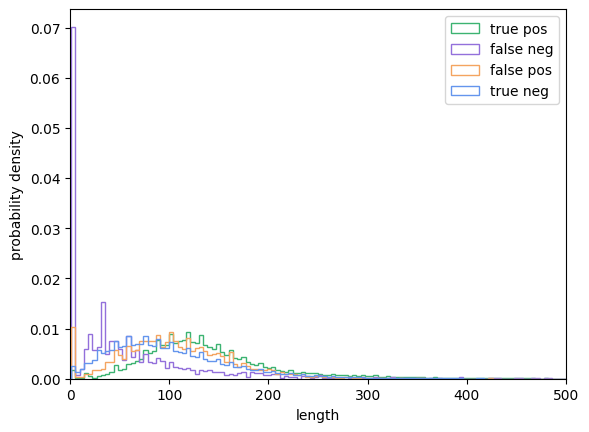

In [31]:
tn_df = hc3_all_sentences_df[(hc3_all_sentences_df['label']==0) & (hc3_all_sentences_df['pred_label']==0)]
fp_df = hc3_all_sentences_df[(hc3_all_sentences_df['label']==0) & (hc3_all_sentences_df['pred_label']==1)]
fn_df = hc3_all_sentences_df[(hc3_all_sentences_df['label']==1) & (hc3_all_sentences_df['pred_label']==0)]
tp_df = hc3_all_sentences_df[(hc3_all_sentences_df['label']==1) & (hc3_all_sentences_df['pred_label']==1)]
colors = ['cornflowerblue', 'sandybrown', 'mediumpurple', 'mediumseagreen']
labels = ['true neg', 'false pos', 'false neg', 'true pos']
plt.hist(
    [tn_df['text'].map(len), fp_df['text'].map(len), fn_df['text'].map(len), tp_df['text'].map(len)], 
    500, 
    color=colors, 
    label=labels,
    fill=False,
    histtype='step',
    density=True,
)
plt.xlim((0,500))
plt.legend()
plt.xlabel('length')
plt.ylabel('probability density')
plt.show()

In [32]:
def true_negatives(data):
    return (data['label']==0) & (data['pred_label']==0)

def false_positives(data):
    return (data['label']==0) & (data['pred_label']==1)

def false_negatives(data):
    return (data['label']==1) & (data['pred_label']==0)

def true_positives(data):
    return (data['label']==1) & (data['pred_label']==1)

def compare_hist(data, conditions, metric, colors, labels, xlabel="", title="", **kwargs):
    dfs = [data[cond(data)] for cond in conditions]
    plt.hist(
        [df['text'].map(metric) for df in dfs],
        500,
        color=colors,
        label=labels,
        **kwargs
    )
    plt.xlim((0,500))
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel('probability density')
    plt.title(title)
    plt.show()

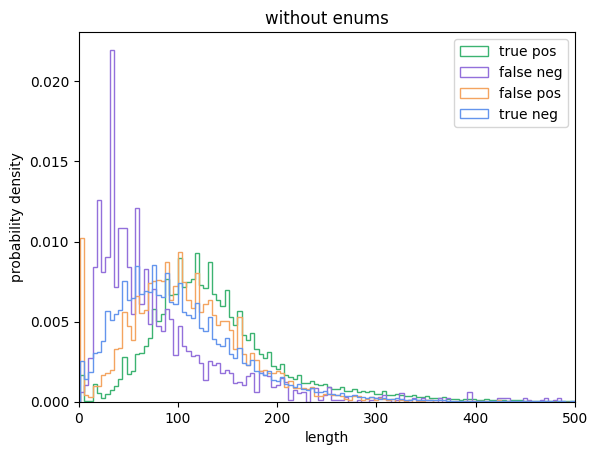

In [33]:
hc3_all_sentences_noenums_df = hc3_all_sentences_df[~hc3_all_sentences_df['text'].str.fullmatch('[0-9]\.')]
colors = ['cornflowerblue', 'sandybrown', 'mediumpurple', 'mediumseagreen']
labels = ['true neg', 'false pos', 'false neg', 'true pos']
compare_hist(
    hc3_all_sentences_noenums_df,
    [true_negatives, false_positives, false_negatives, true_positives],
    len,
    colors,
    labels,
    fill=False,
    histtype='step',
    density=True,
    xlabel='length',
    title='without enums',
)

In [40]:
import numpy as np

def compare_hist_gltr(data, conditions, metric, colors, labels, **kwargs):
    dfs = [data[cond(data)] for cond in conditions]
    metrics = [df['token_rankings'].map(metric) for df in dfs]
    plt.hist(
        metrics,
        num_bins,
        color=colors,
        label=labels,
        **kwargs
    )
    plt.legend()
    plt.show()

def get_rankings(real_topk):
    return list(map(lambda t: t[0], real_topk))

In [33]:
get_rankings([(2127, 6e-05), (11, 0.00866), (0, 0.35426)])

[2127, 11, 0]

In [31]:
hc3_all_sentences_test_df['token_rankings'] = hc3_all_sentences_test_df['real_topk'].map(get_rankings)
hc3_all_sentences_test_df.iloc[0]

Unnamed: 0.1                                                      0
Unnamed: 0                                                        0
label                                                             0
text              Basically there are many categories of " Best ...
data_idx                                                          0
pred                                                          Human
pred_score                                                 0.999755
pred_label                                                        0
real_topk         [(2127, 6e-05), (11, 0.00866), (0, 0.35426), (...
token_rankings          [2127, 11, 0, 7, 63, 0, 2, 10322, 8, 0, 33]
Name: 0, dtype: object

In [29]:
hc3_all_sentences_test_noenums_df = hc3_all_sentences_test_df[~hc3_all_sentences_test_df['text'].str.fullmatch('[0-9]\.')]
colors = ['cornflowerblue', 'sandybrown', 'mediumpurple', 'mediumseagreen']
labels = ['true neg', 'false pos', 'false neg', 'true pos']
compare_hist_gltr(
    hc3_all_sentences_test_noenums_df,
    [true_negatives, false_positives, false_negatives, true_positives],
    np.mean,
    colors,
    labels,
    fill=False,
    histtype='step',
    density=True,
)

NameError: name 'hc3_all_sentences_test_df' is not defined